# Simulation Func for Regression 

In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
# import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb
from bart_survival import simulation as sm
import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
import sys
sys.path.append("../py/")
sys.path.append("../src/")
import _conditions1 as cn
import _param1 as prm
import _functions1 as fn
import _sim_iter1 as si
import _plot_fx as pltf
#s
import sim_adj as sim

In [50]:
# importlib.reload(sim)
importlib.reload(fn)
importlib.reload(prm)

<module '_param1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_param1.py'>

In [53]:
cens_perc, sv_true_r0, pb_sv_m, hdi, ci, r_sv, k_sv = fn.sim_1s(
	seed = 91,
	n = 200,
	scenario = cn.simple_1_1,
	SPLIT_RULES = prm.SPLIT_RULES1,
	model_dict = prm.MODEL_DICT1,
	sampler_dict = prm.SAMPLER_DICT1
)

mean shape 3.0
mean scale 7.0
13.0
mean time draws 6.585826458103916
cens mean 43.59
qnut_t: [3 5 6 8 9]
unique_t: [3. 5. 6. 8. 9.]


Only 400 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 100 tune and 400 draw iterations (500 + 2_000 draws total) took 28 seconds.
Sampling: [f]


[[[0.92950784 0.97766542]
  [0.67845561 0.79296157]
  [0.48853863 0.61729354]
  [0.2254657  0.33338562]
  [0.1209044  0.21584505]]

 [[0.92950784 0.97766542]
  [0.67845561 0.79296157]
  [0.48853863 0.61729354]
  [0.2254657  0.33338562]
  [0.1209044  0.21584505]]]
[[[0.92683137 0.67756596 0.48942509 0.22848576 0.12148191]
  [0.92683137 0.67756596 0.48942509 0.22848576 0.12148191]]

 [[0.97687932 0.79229824 0.6216724  0.33859365 0.22094291]
  [0.97687932 0.79229824 0.6216724  0.33859365 0.22094291]]]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 652, 1, 5
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 3.000000, 6.000000
xp1,xp[np*p]: 3.000000, 9.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 4
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.748783
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167


In [55]:
k_sv

(array([0.96      , 0.73066667, 0.56333842, 0.27295779, 0.16749683]),
 array([[0.92161107, 0.6613179 , 0.48849995, 0.20931836, 0.11564824],
        [0.97979295, 0.78810506, 0.63147675, 0.34026268, 0.22764165]]),
 array([3., 5., 6., 8., 9.]))

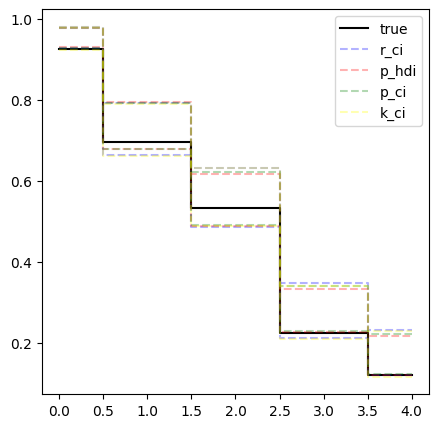

In [62]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.step(range(5), sv_true_r0, where="mid", color="black", label="true")
ax.step(range(5), r_sv[1][1,:], color="blue", alpha=0.3, linestyle="dashed", where="mid", label="r_ci")
ax.step(range(5), r_sv[1][0,:], color="blue", alpha=0.3, linestyle="dashed", where="mid")
ax.step(range(5), hdi[1,:], color="red", alpha=0.3,linestyle="dashed", where="mid", label="p_hdi")
ax.step(range(5), hdi[0,:], color="red", alpha=0.3,linestyle="dashed", where="mid")
ax.step(range(5), ci[1,:], color="green", alpha=0.3,linestyle="dashed", where="mid", label = "p_ci")
ax.step(range(5), ci[0,:], color="green", alpha=0.3,linestyle="dashed", where="mid")
ax.step(range(5), k_sv[1][1,:], color="yellow", alpha=0.3,linestyle="dashed", where="mid", label = "k_ci")
ax.step(range(5), k_sv[1][0,:], color="yellow", alpha=0.3, linestyle="dashed", where="mid")
# sv_true_r0
ax.legend()

In [67]:
importlib.reload(si)

<module '_sim_iter1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_sim_iter1.py'>

In [77]:
seeds, cens, k, p, r, fig = si.iter_simulation_1s(
	iters = 2, 
	n = 200, 
	seed_addl = 99, 
	scenario = cn.simple_1_1, 
	SPLIT_RULES = prm.SPLIT_RULES1, 
	model_dict = prm.MODEL_DICT1, 
	sampler_dict = prm.SAMPLER_DICT1
)

ITERATION************** 19800
mean shape 3.0
mean scale 7.0
13.0
mean time draws 6.135526717598713
cens mean 48.215
qnut_t: [3 5 6 8 9]
unique_t: [3. 5. 6. 8. 9.]


Only 400 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 100 tune and 400 draw iterations (500 + 2_000 draws total) took 28 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 597, 1, 5
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 3.000000, 9.000000
xp1,xp[np*p]: 3.000000, 9.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 4
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.644482
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167
ITERATION***********

Only 400 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 100 tune and 400 draw iterations (500 + 2_000 draws total) took 26 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 647, 1, 5
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 3.000000, 5.000000
xp1,xp[np*p]: 3.000000, 9.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 4
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.712681
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,1,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167


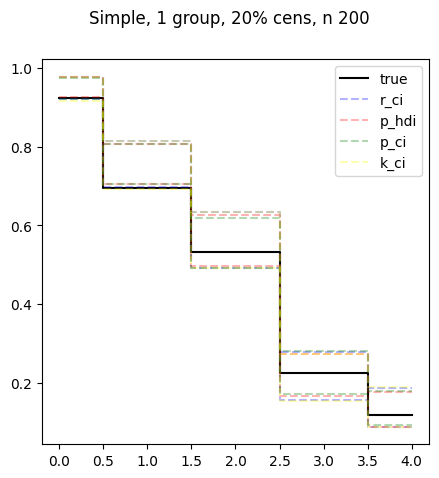

In [84]:
# seeds, cens, k, p, r, fig 
# fig
fig

In [89]:
importlib.reload(prm)
prm.SAMPLER_DICT2

{'draws': 400,
 'tune': 100,
 'cores': 5,
 'chains': 5,
 'compute_convergence_checks': False}

In [112]:
importlib.reload(fn)
odict = fn.sim_2s(
	seed = 99,
	n = 200,
	scenario = cn.simple_2_1,
	SPLIT_RULES = prm.SPLIT_RULES2,
	model_dict = prm.MODEL_DICT2,
	sampler_dict = prm.SAMPLER_DICT2
)

mean shape 1.7399999999999993
mean scale 11.73
49.0
mean time draws 10.116044921316782
cens mean 71.92
[ 3  6  9 14 19]
[ 3.  6.  9. 14. 19.]


Only 400 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 100 tune and 400 draw iterations (500 + 2_000 draws total) took 41 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 622, 2, 10
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 3.000000, 1.000000
xp1,xp[np*p]: 3.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.641958
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167


In [114]:
odict

{'cens_perc': 0.19,
 'uniq_t': array([ 3.,  6.,  9., 14., 19.]),
 'sv_true_u': (array([0.82740203, 0.64708651, 0.49259614, 0.30023332, 0.17626819]),
  array([0.9493143 , 0.78741506, 0.55812398, 0.21405757, 0.04889775])),
 'pb_sv': ((array([0.82738857, 0.66012676, 0.48485283, 0.29822685, 0.1841394 ]),
   array([[0.76244678, 0.57690463, 0.40004229, 0.2248575 , 0.12052617],
          [0.88097994, 0.73752521, 0.57337374, 0.38150542, 0.25966207]]),
   array([[0.77192485, 0.5819832 , 0.40004229, 0.21939273, 0.11975878],
          [0.88560418, 0.74047995, 0.57334624, 0.37289954, 0.25545016]])),
  (array([0.88096543, 0.72093139, 0.47685364, 0.19031935, 0.07961693]),
   array([[0.8253446 , 0.63385851, 0.38913006, 0.12657578, 0.03516095],
          [0.92869128, 0.79574656, 0.5647504 , 0.26222058, 0.14313911]]),
   array([[0.82383837, 0.633623  , 0.38787378, 0.12509765, 0.03165306],
          [0.9270011 , 0.79570683, 0.56344892, 0.25906108, 0.13414533]])),
  array([ 3.,  6.,  9., 14., 19.])),
 'r

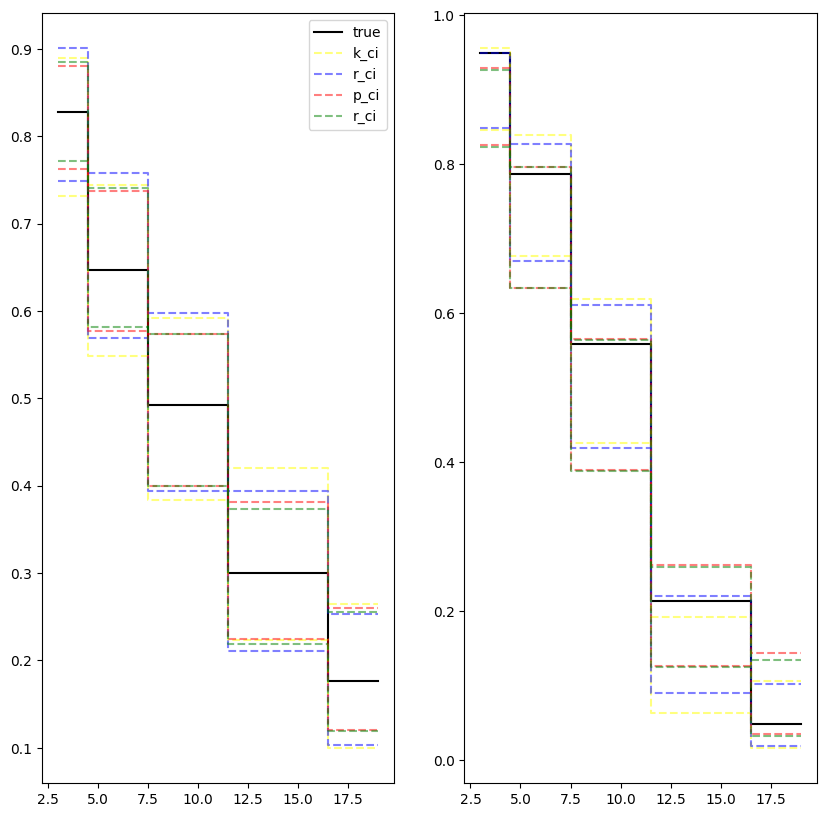

In [134]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].step(odict["uniq_t"], odict["sv_true_u"][0], color= "black", where="mid", label = "true")
ax[1].step(odict["uniq_t"], odict["sv_true_u"][1], color = "black", where= "mid")
ax[0].step(odict["uniq_t"], odict["k_sv"][0][1][0,:], color = "yellow", where="mid", alpha=0.5, linestyle="dashed", label="k_ci")
ax[0].step(odict["uniq_t"], odict["k_sv"][0][1][1,:], color = "yellow", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["k_sv"][1][1][0,:], color = "yellow", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["k_sv"][1][1][1,:], color = "yellow", where="mid", alpha=0.5, linestyle="dashed")
ax[0].step(odict["uniq_t"], odict["r_sv"][0][1][0,:], color = "blue", where="mid", alpha=0.5, linestyle="dashed", label = "r_ci")
ax[0].step(odict["uniq_t"], odict["r_sv"][0][1][1,:], color = "blue", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["r_sv"][1][1][0,:], color = "blue", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["r_sv"][1][1][1,:], color = "blue", where="mid", alpha=0.5, linestyle="dashed")
ax[0].step(odict["uniq_t"], odict["pb_sv"][0][1][0,:], color = "red", where="mid", alpha=0.5, linestyle="dashed", label="p_ci")
ax[0].step(odict["uniq_t"], odict["pb_sv"][0][1][1,:], color = "red", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["pb_sv"][1][1][0,:], color = "red", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["pb_sv"][1][1][1,:], color = "red", where="mid", alpha=0.5, linestyle="dashed")
ax[0].step(odict["uniq_t"], odict["pb_sv"][0][2][0,:], color = "green", where="mid", alpha=0.5, linestyle="dashed", label="r_ci")
ax[0].step(odict["uniq_t"], odict["pb_sv"][0][2][1,:], color = "green", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["pb_sv"][1][2][0,:], color = "green", where="mid", alpha=0.5, linestyle="dashed")
ax[1].step(odict["uniq_t"], odict["pb_sv"][1][2][1,:], color = "green", where="mid", alpha=0.5, linestyle="dashed")
ax[0].legend()

fig

In [144]:
# importlib.reload(fn)
importlib.reload(si)
importlib.reload(prm)
seed, cens, k,p,r, figs = si.iter_simulation_2s(
	iters = 1,
	n = 200, 
	seed_addl = 99,
	scenario = cn.simple_2_1,
	SPLIT_RULES = prm.SPLIT_RULES2,
	model_dict = prm.MODEL_DICT2,
	sampler_dict = prm.SAMPLER_DICT2
)

ITERATION************** 19800
mean shape 1.7349999999999997
mean scale 11.7325
49.0
mean time draws 10.626348109766386
cens mean 67.92
[ 3  6  9 14 19]
[ 3.  6.  9. 14. 19.]


Only 400 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 100 tune and 400 draw iterations (500 + 2_000 draws total) took 42 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 602, 2, 10
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 3.000000, 1.000000
xp1,xp[np*p]: 3.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 4 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.656305
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 4s
trcnt,tecnt: 167,167


In [151]:
# seed, cens, k,p,r, figs 
figs[0]
p
# r

{'rmse': array([0.0151081 , 0.04750919, 0.0401252 , 0.0210718 , 0.00925743]),
 'bias': array([ 0.0151081 ,  0.04750919,  0.0401252 ,  0.00407594, -0.00925743]),
 'cov': (array([1. , 0.5, 1. , 1. , 1. ]), array([1. , 0.5, 1. , 1. , 1. ])),
 'ivl': (array([0.09133527, 0.12976419, 0.14288956, 0.11727649, 0.09295998]),
  array([0.09111719, 0.12795877, 0.14172734, 0.1155551 , 0.09080647]))}

In [26]:
import lifelines as ll
kpm = ll.KaplanMeierFitter()


mean shape 3.0
mean scale 7.0
13.0
mean time draws 6.156399357353597


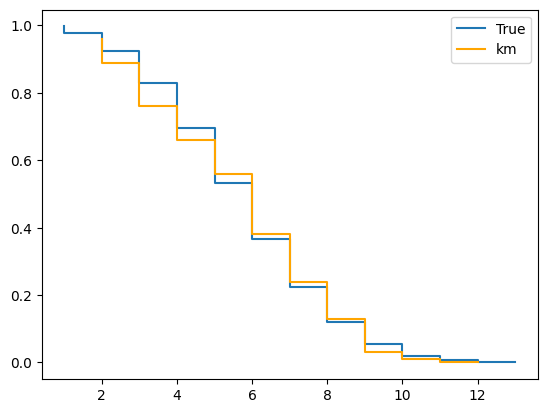

In [3]:
reg_1 = {
    "type": "Simple, 1 group, 20% cens",
    "x_vars": 1, 
    "VAR_CLASS": [2],
    "VAR_PROB":[1],
    "scale_f": "7*x_mat[:,0]",
    "shape_f": "3",
    "cens_scale":3.3
}

rng = np.random.default_rng(110)
x_mat = sim.get_x_matrix(
    N = 100, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sim.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    # eos=20,
    rng=rng,
    # force_eos=True
)

kpm = ll.KaplanMeierFitter()
kpm.fit(event["t_event"], event["status"])
km = kpm.survival_function_.values.T.reshape(-1,1)[1:]
kmt = kpm.timeline.reshape(-1,1)[1:]
km

sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(1):
    plt.step(ttt, sv[i,:], label="True")
    plt.step(kmt, km, label = "km", color="orange")
plt.legend()



In [159]:

BSM = sb.BartSurvModel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [163]:
importlib.reload(sim)

<module 'sim_adj' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../src/sim_adj.py'>

mean shape 1.7229357798165128
mean scale 11.738532110091743
49.0
mean time draws 9.997151366861916


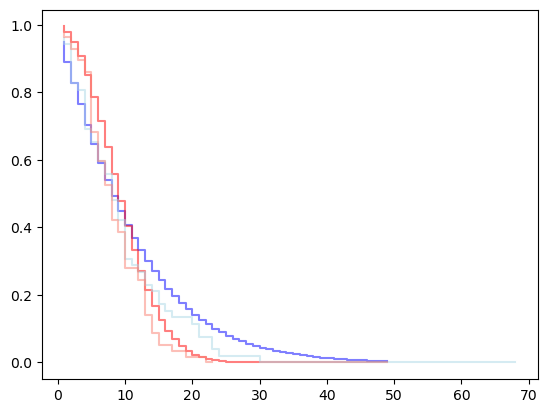

In [19]:

# reg_1 = {
#     "type": "Simple, 1 group, 20% cens",
#     "x_vars": 1, 
#     "VAR_CLASS": [2],
#     "VAR_PROB":[1],
#     "scale_f": "7*x_mat[:,0]",
#     "shape_f": "3",
#     "cens_scale":3.3
# }
reg_1 = {
    "type": "Simple, 2 group, 20% cens",
    "x_vars": 1, 
    "VAR_CLASS": [2],
    "VAR_PROB":[.5],
    "scale_f": "12 - .5 *x_mat[:,0]",
    "shape_f": "1.2 + 1 *x_mat[:,0]",
    "cens_scale":3
}

ends = []
for i in range(1):
	rng = np.random.default_rng(99)
	x_mat = sim.get_x_matrix(
		N = 109, 
		x_vars = reg_1["x_vars"], 
		VAR_CLASS=reg_1["VAR_CLASS"],
		VAR_PROB=reg_1["VAR_PROB"],
		rng=rng
		)
	event, sv_true, sv_scale_true = sim.simulate_survival(
		x_mat = x_mat,
		scale_f=reg_1["scale_f"],
		shape_f=reg_1["shape_f"],
		rng=rng
	)
	ends.append(sv_true["true_times"].max())
msk = x_mat[:,0] == 0


kpm = ll.KaplanMeierFitter()
kpm.fit(event["t_event"][msk], event["status"][msk])
km0 = kpm.survival_function_.values.T.reshape(-1,1)[1:]
kmt0 = kpm.timeline.reshape(-1,1)[1:]

kpm = ll.KaplanMeierFitter()
kpm.fit(event["t_event"][~msk], event["status"][~msk])
km1 = kpm.survival_function_.values.T.reshape(-1,1)[1:]
kmt1 = kpm.timeline.reshape(-1,1)[1:]


sv0 = sv_true["sv_true"][msk,:].mean(0)
sv1 = sv_true["sv_true"][~msk,:].mean(0)
ttt = sv_true["true_times"]
# for i in range(1):
plt.step(ttt, sv0, label="True", color = "blue", alpha=0.5)
plt.step(ttt, sv1, label="True", color = "red", alpha=0.5)
plt.step(kmt0, km0, label = "km", color="lightblue", alpha=0.5)
plt.step(kmt1, km1, label = "km", color="salmon", alpha=0.5)
# plt.legend()




In [527]:
# np.quantile(sv_true["sv_true"], [0.1,0.25,0.5,0.75,0.9],)
# sv_true["sv_true"][0,:]


# sv_true["sv_true"][0,:]

def get_quant_times(sv_true_c, true_times, quant=[0.9,0.75,0.5,0.25,0.1]):
	qnt_t = []
	for i in quant:
		tmp = np.abs(sv_true_c - i)
		idx = tmp == tmp.min()
		qnt_t.append(true_times[idx])
	return np.array(qnt_t)

In [529]:
c1 = sv_true["sv_true"].mean(0)
c1_q = get_quant_times(c1, sv_true["true_times"])

In [530]:
c1_q
# c1[c1_q-1]

# c1_q[c1-1]
# sv_true["sv_true"][[0,-3],:]

array([[ 2],
       [ 4],
       [ 9],
       [14],
       [20]])

In [442]:
def get_quant_events(qnt_t, event):

	q = np.array(qnt_t)
	# q = np.quantile(sv_true["true_times"], quant, method=method)
	# print(q)
	et_ = event["t_event"].copy()
	et_out = event["t_event"].copy()
	es_out = event["status"].copy()
	for i in range(q.shape[0]):
		if i == 0:
			msk = et_<=q[i]
			et_out[msk] = q[i]
			# print(np.unique(et_out))
		else:
			msk = (q[i-1] < et_) & (et_ <= q[i])
			et_out[msk] = q[i]
			# print(np.unique(et_out))
			if i == q.shape[0]-1:
				msk = et_ > q[i]
				et_out[msk] = q[i]
				es_out[msk] = 0

	return {"t_event":et_out, "status":es_out}


# Complex Regression

In [50]:
reg_1 = {
    # "type": "Simple, 1 group, 20% cens",
    "x_vars": 10, 
    "VAR_CLASS": [1,1,1,1,1,1,1,1,1,1],
    "VAR_PROB":[None,None,None,None,None,None,None,None,None,None],
    "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f": "2",
    "cens_scale":None
}


In [51]:
rng = np.random.default_rng(99)
x_mat = sm.get_x_matrix(
    N = 400, 
    x_vars = reg_1["x_vars"], 
    VAR_CLASS=reg_1["VAR_CLASS"],
    VAR_PROB=reg_1["VAR_PROB"],
    rng=rng
    )
event, sv_true, sv_scale_true = sm.simulate_survival(
    x_mat = x_mat,
    scale_f=reg_1["scale_f"],
    shape_f=reg_1["shape_f"],
    rng=rng
)

mean shape 2.0
mean scale 44.01964734948047
mean time draws 39.93344379031392


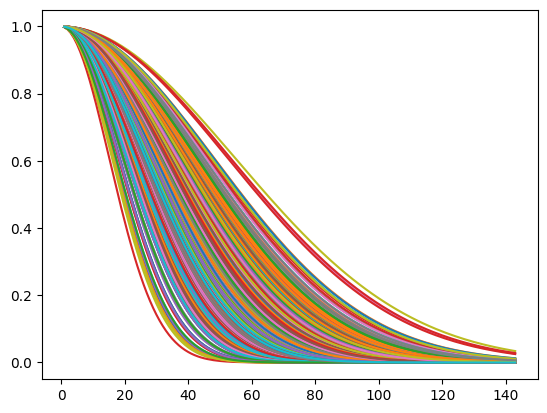

In [52]:
sv = sv_true["sv_true"]
ttt = sv_true["true_times"]
for i in range(400):
    plt.plot(ttt, sv[i,:])